In [2]:
# Install seaborn
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: done

## Package Plan ##

  environment location: /home/ubuntu/miniconda3

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    patsy-0.5.0                |           py37_0         321 KB
    seaborn-0.9.0              |           py37_0         379 KB
    statsmodels-0.9.0          |   py37h035aef0_0         8.8 MB
    ------------------------------------------------------------
                                           Total:         9.5 MB

The following NEW packages will be INSTALLED:

    patsy:       0.5.0-py37_0        
    seaborn:     0.9.0-py37_0        
    statsmodels: 0.9.0-py37h035aef0_0


patsy-0.5.0          | 321 KB    | ##################################### | 100% 
seaborn-0.9.0        | 379 KB    | ##################################### | 100% 
statsmodels-0.9.0    | 8.8 MB    | ################################

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [14]:
mov = pd.read_csv('../Data/Movie-Gross.csv', encoding='latin1')

In [15]:
mov.head()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [16]:
mov.describe()

,Budget ($mill),IMDb Rating,MovieLens Rating,Overseas%,Profit%,Runtime (min),US ($mill),Gross % US
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,92.467928,6.923849,3.340378,57.698849,719.278783,117.781250,167.135197,42.301151
std,59.421407,0.925890,0.454071,12.334237,1942.807248,23.179122,92.465903,12.334237
min,0.600000,3.600000,1.490000,17.200000,7.700000,30.000000,0.000000,0.000000
25%,45.000000,6.375000,3.037500,49.900000,201.850000,100.000000,106.950000,33.700000
50%,80.000000,6.900000,3.365000,58.200000,338.550000,116.000000,141.700000,41.800000
75%,130.000000,7.600000,3.672500,66.300000,650.100000,130.250000,202.100000,50.100000
max,300.000000,9.200000,4.500000,100.000000,41333.300000,238.000000,760.500000,82.800000


In [17]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
Day of Week               608 non-null object
Director                  608 non-null object
Genre                     608 non-null object
Movie Title               608 non-null object
Release Date              608 non-null object
Studio                    608 non-null object
Adjusted Gross ($mill)    608 non-null object
Budget ($mill)            608 non-null float64
Gross ($mill)             608 non-null object
IMDb Rating               608 non-null float64
MovieLens Rating          608 non-null float64
Overseas ($mill)          608 non-null object
Overseas%                 608 non-null float64
Profit ($mill)            608 non-null object
Profit%                   608 non-null float64
Runtime (min)             608 non-null int64
US ($mill)                608 non-null float64
Gross % US                608 non-null float64
dtypes: float64(7), int64(1), object(10)
memory usage: 85.6+ 

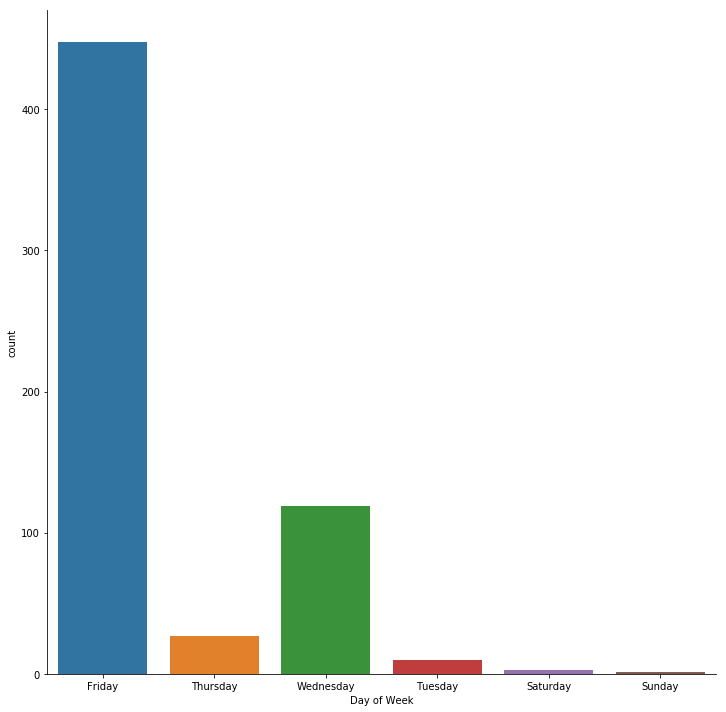

In [18]:
vis1 = sns.factorplot(data = mov, x='Day of Week', kind='count', size = 10)

In [19]:
mov.Studio.unique()

array(['Buena Vista Studios', 'Lionsgate', 'Sony', 'Universal',
       'Paramount Pictures', 'WB', 'Weinstein Company',
       'UA Entertainment', 'WB/New Line', 'New Line Cinema', 'Fox',
       'TriStar', 'Relativity Media', 'Screen Gems', 'StudioCanal',
       'Fox Searchlight Pictures', 'MiraMax', 'Path_ Distribution',
       'DreamWorks', 'Lionsgate Films', 'Revolution Studios',
       'Dimension Films', 'USA', 'Lionsgate/Summit',
       'Sony Picture Classics', 'Pacific Data/DreamWorks', 'Disney',
       'Art House Studios', 'Colombia Pictures', 'Gramercy Pictures',
       'Summit Entertainment', 'Vestron Pictures', 'MGM', 'Orion', 'IFC',
       'New Market Films'], dtype=object)

In [20]:
len(mov.Studio.unique())

36

In [21]:
mov.Genre.unique()

array(['action', 'comedy', 'adventure', 'horror', 'animation',
       'biography', 'drama', 'musical', 'sci-fi', 'crime', 'romance',
       'fantasy', 'mystery', 'thriller', 'documentary'], dtype=object)

In [22]:
len(mov.Genre.unique())

15

In [23]:
mov2 = mov[(mov.Studio == 'Fox') | (mov.Studio == 'WB') | (mov.Studio == 'WB') | (mov.Studio == 'WB') | (mov.Studio == 'WB') | (mov.Studio == 'WB')]
studio_filters = ['Buena Vista Studios', 'Fox', 'Paramount Pictures', 'Sony', 'Universal', 'WB']
mov3 = mov2[mov2.Studio.isin(studio_filters)]


In [24]:
mov2.head()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
10,Friday,Eric Brevig,animation,Yogi Bear,17/12/2010,WB,219.9,80.0,201.6,4.5,2.17,101.3,50.3,121.6,152.0,80,100.2,49.7
24,Friday,Todd Phillips,comedy,Due Date,5/11/2010,WB,231,65.0,211.8,6.6,3.17,111.2,52.5,146.8,225.9,95,100.5,47.5
27,Friday,Martin Campbell,action,Green Lantern,17/06/2011,WB,232.5,200.0,219.9,5.7,2.87,103.3,47.0,19.9,10.0,114,116.6,53.0
28,Wednesday,Baz Luhrmann,adventure,Australia,26/11/2008,Fox,233.4,78.0,211.3,7.6,3.50,161.8,76.6,133.3,170.9,165,49.6,23.4
30,Friday,Paul Feig,action,The Heat,28/06/2013,Fox,234.7,43.0,229.9,6.6,4.07,70.3,30.6,186.9,434.7,117,159.6,69.4


In [25]:
mov2.Studio.unique()

array(['WB', 'Fox'], dtype=object)

In [26]:
genre_filters = ['action','adventure','animation','drama','comedy']
mov2 = mov[mov.Genre.isin(genre_filters)]

In [27]:
mov2.Genre.unique()

array(['action', 'comedy', 'adventure', 'animation', 'drama'],
      dtype=object)

In [28]:
studio_filters = ['Buena Vista Studios', 'Fox', 'Paramount Pictures', 'Sony', 'Universal', 'WB']
mov3 = mov2[mov2.Studio.isin(studio_filters)]


In [29]:
print(mov3.Studio.unique())

['Buena Vista Studios' 'Sony' 'Universal' 'WB' 'Paramount Pictures' 'Fox']


In [30]:
len(mov3)

423

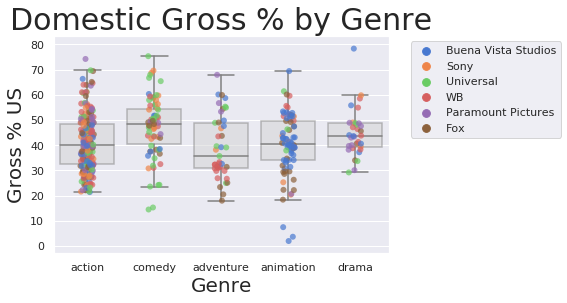

In [31]:
sns.set(style="darkgrid", palette='muted', color_codes=True)

ax = sns.boxplot( data= mov3, x='Genre', y = 'Gross % US', orient='v', color='lightgray', showfliers = False)
plt.setp(ax.artists, alpha=0.5)

sns.stripplot( data = mov3, x='Genre', y = 'Gross % US', jitter=True, size=6, linewidth=0, hue='Studio', alpha = 0.7)

ax.axes.set_title('Domestic Gross % by Genre', fontsize=30)
ax.set_xlabel('Genre', fontsize=20)
ax.set_ylabel('Gross % US', fontsize=20)
ax.legend(bbox_to_anchor = (1.05, 1), loc = 2)